In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Data file.csv")
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
df.shape

(209593, 37)

### EDA

In [4]:
# Check for null values in data
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [6]:
# Check for duplicate data
df.duplicated().sum()

0

In [7]:
# Check for unique Values
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

Here pcircle has only one value which is not required for analysis. 

In [8]:
# we can also drop Unnamed,msisdn and pdate which will not affect the analysis
df.drop(columns=['Unnamed: 0', 'pcircle', 'msisdn', 'pdate'],inplace=True)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [9]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [10]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


Here we can see huge difference between mean and 50%, max and 75% for most of the columns, this indicates extreme ouliers in the dataset.

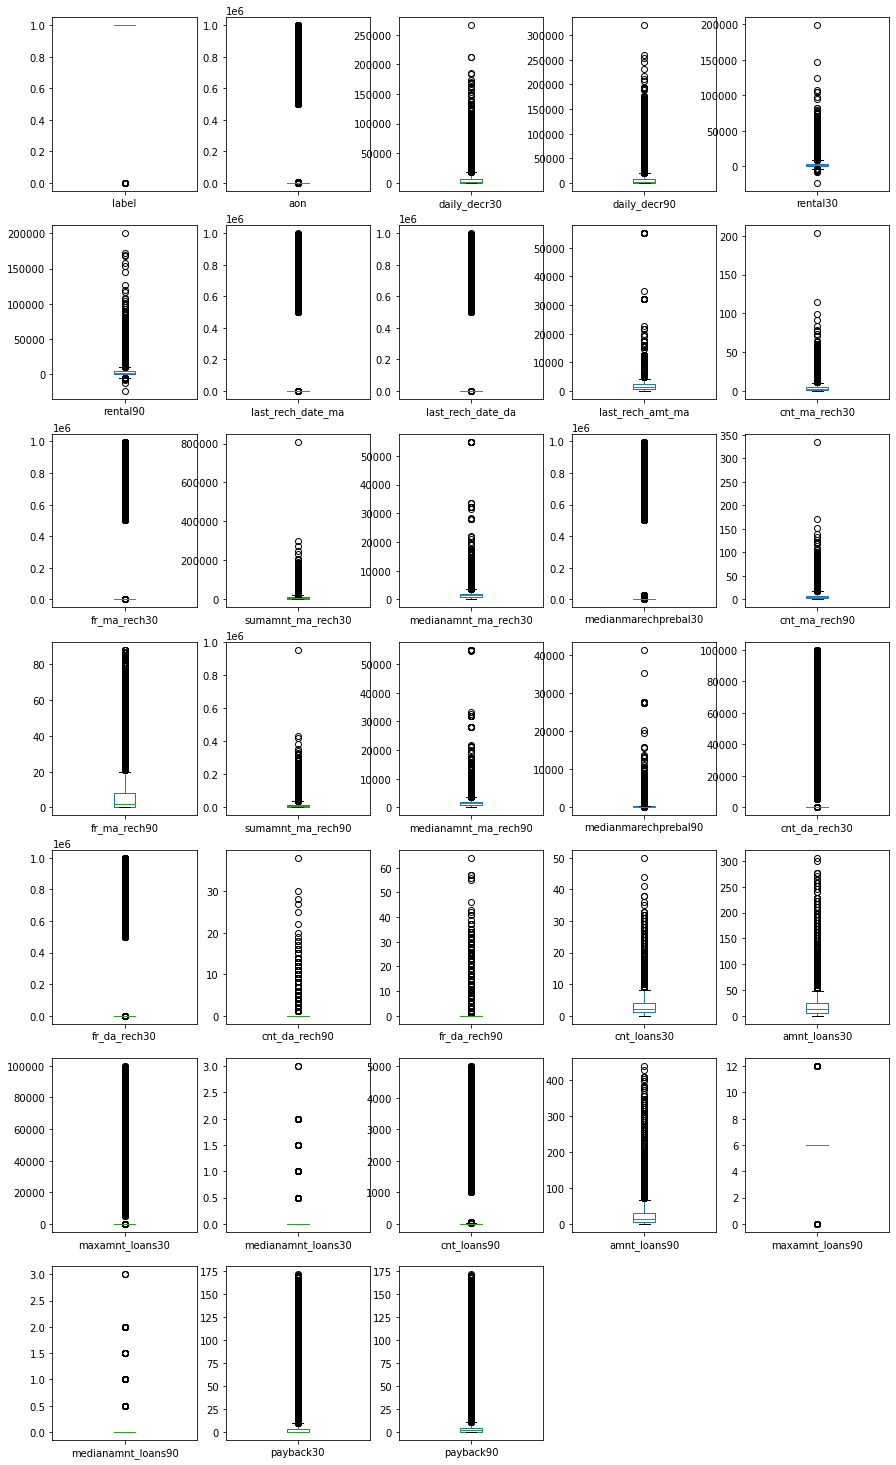

In [11]:
df.plot(kind='box',subplots=True,figsize=(15,30), layout=(8,5))
plt.show()

In [12]:
# Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(df.select_dtypes(include=[np.number])))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(209593, 33)
(161465, 33)


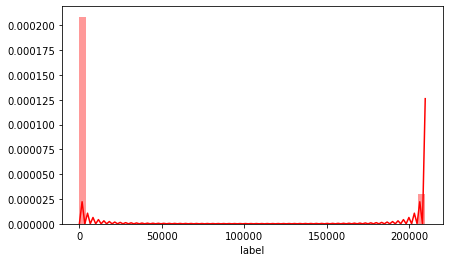

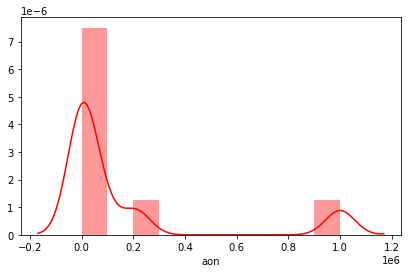

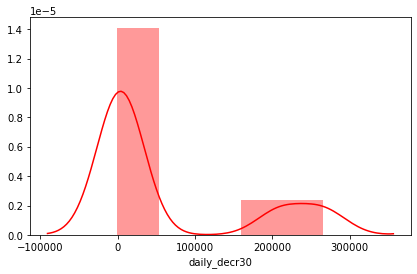

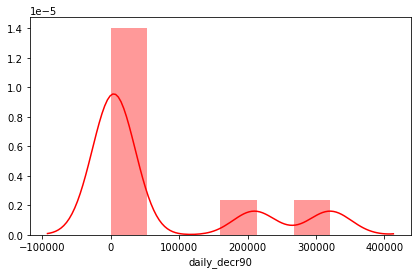

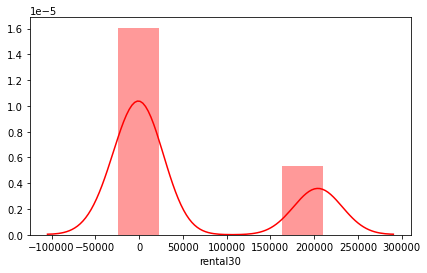

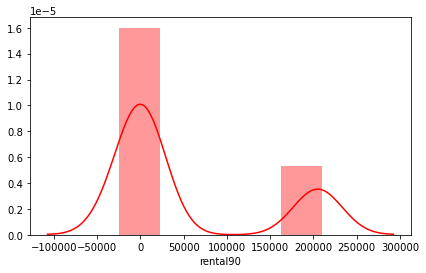

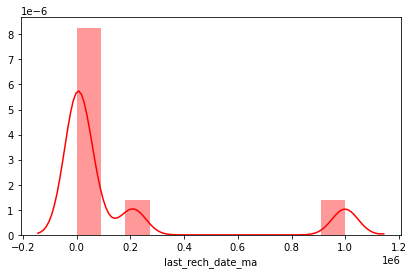

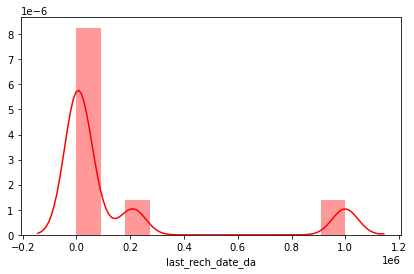

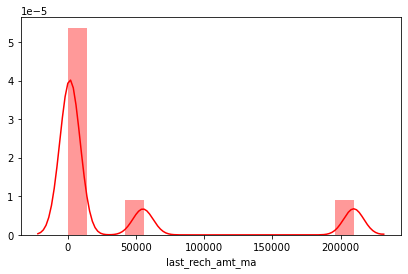

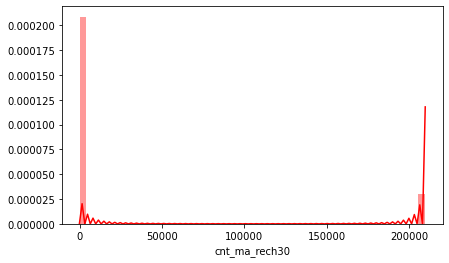

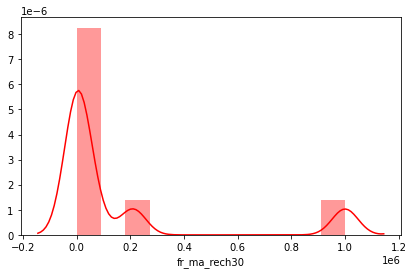

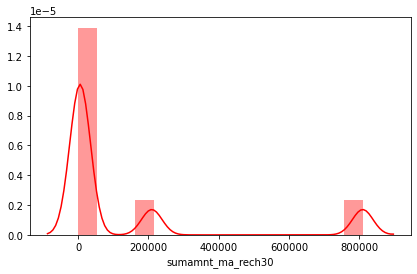

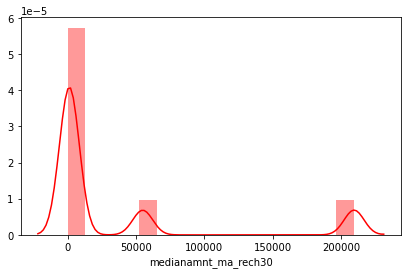

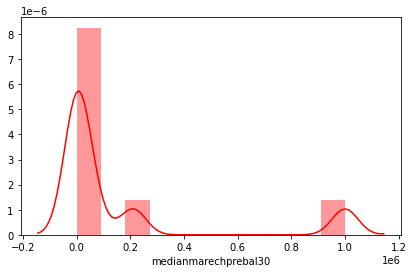

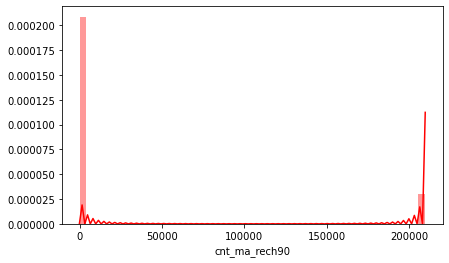

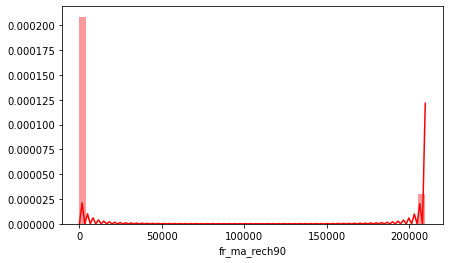

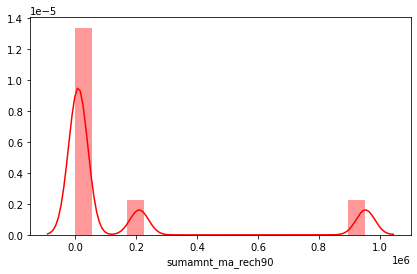

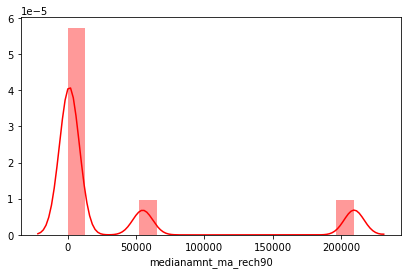

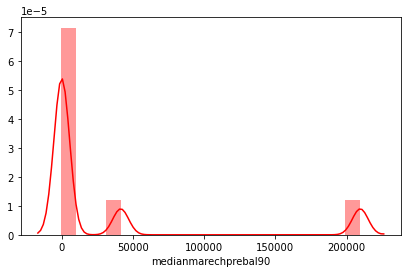

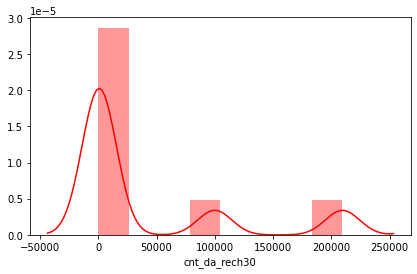

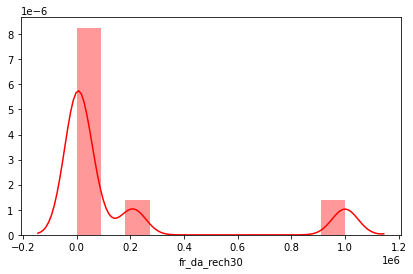

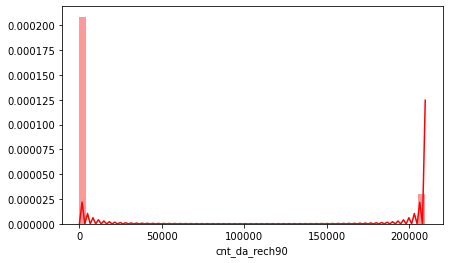

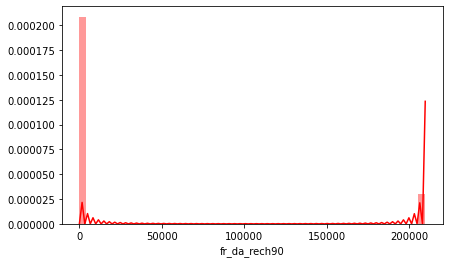

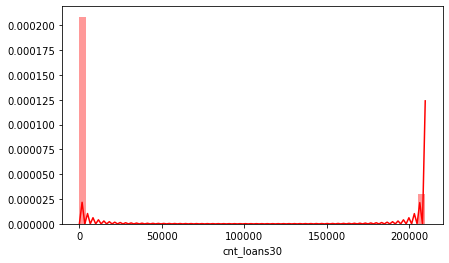

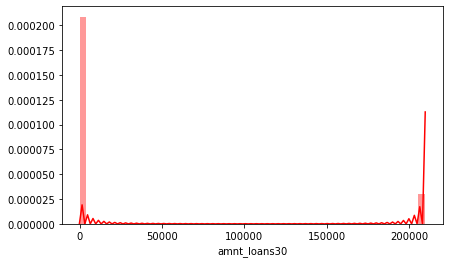

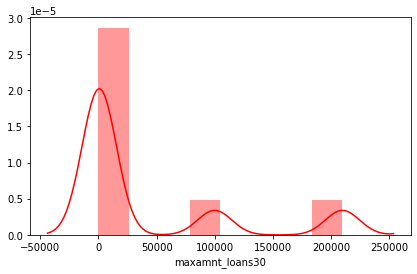

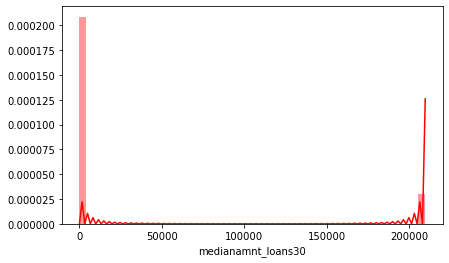

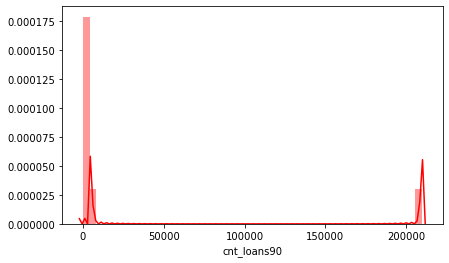

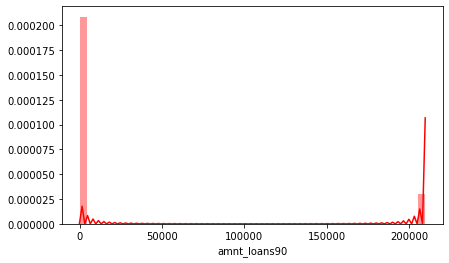

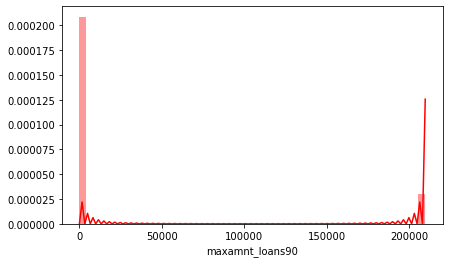

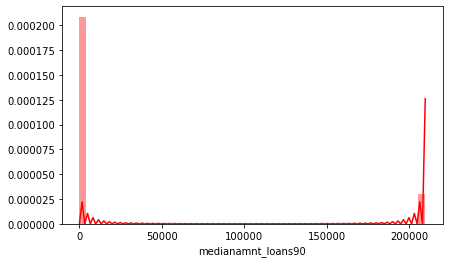

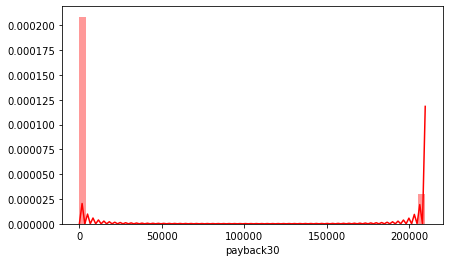

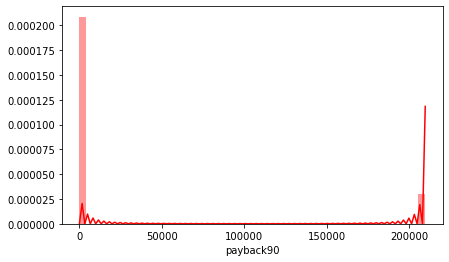

In [13]:
# Plot using distplot
for i in df_final:
    g=plt.figure(figsize=(15,4))
    g.add_subplot(1,2,1)
    sns.distplot(df[i].describe(), color='r',kde=True,label='data')
   

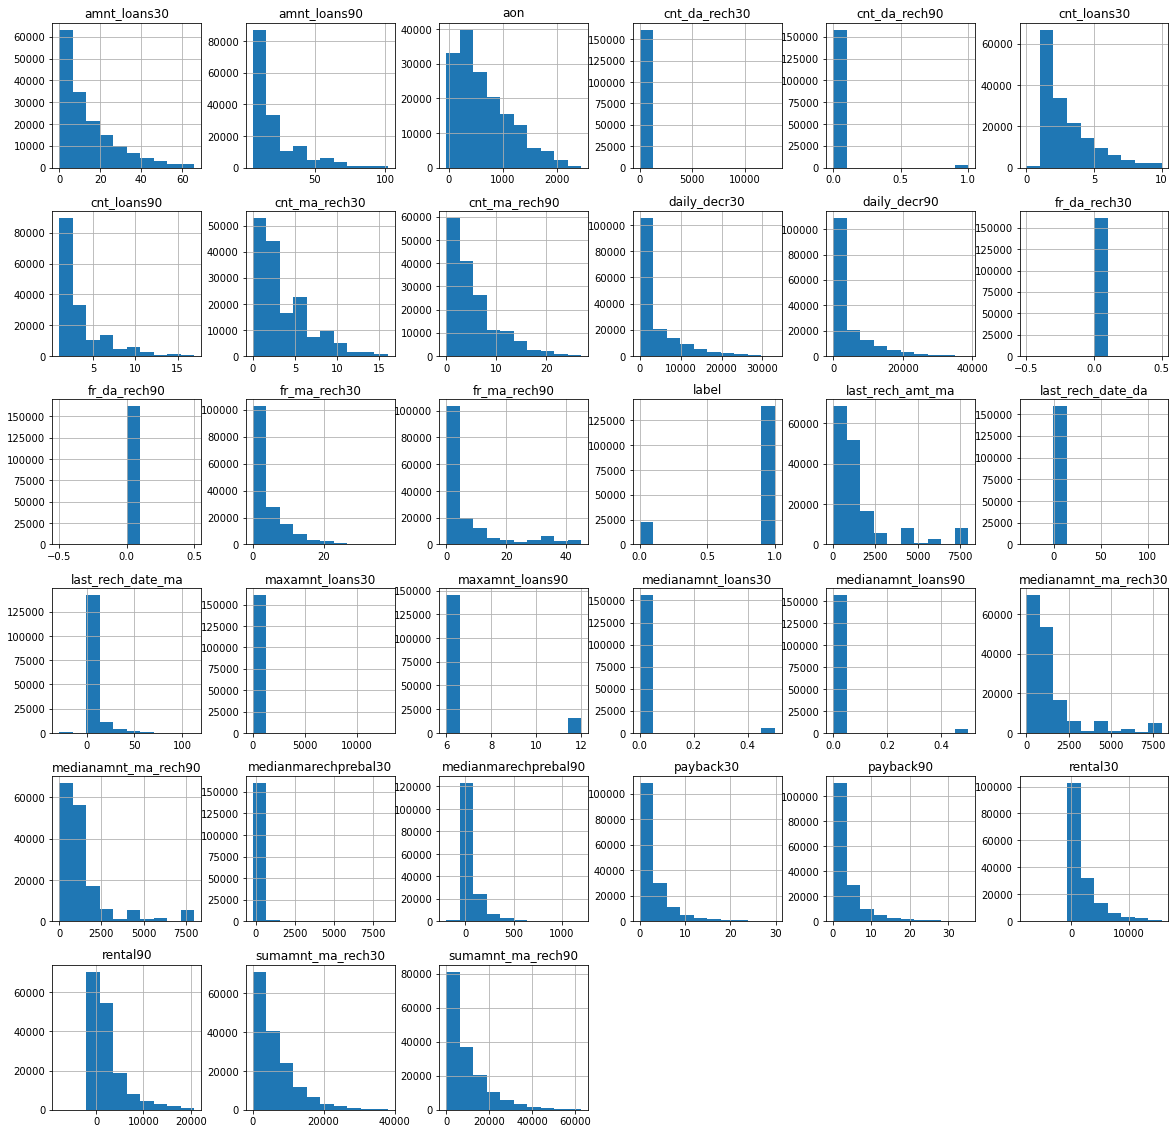

In [14]:
# Histogram
df_final.hist(figsize=(20, 20))
plt.show()

In [15]:
df_final.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,0.086376,0.191662,0.192073,0.048945,0.069545,-0.095769,0.026123,0.159589,0.292492,...,0.238983,0.244307,0.002689,0.040130,0.244240,0.246878,0.088565,0.029620,0.142282,0.141053
aon,0.086376,1.000000,0.071687,0.073848,0.052519,0.057465,0.015165,-0.000733,0.081721,0.015264,...,0.049552,0.052399,0.002055,0.000348,0.082985,0.083288,0.029714,-0.004733,0.021474,0.041227
daily_decr30,0.191662,0.071687,1.000000,0.979246,0.445846,0.495649,-0.046021,0.058444,0.257911,0.396178,...,0.328738,0.420826,0.003933,0.010631,0.514988,0.570296,0.434206,-0.027961,0.148301,0.194491
daily_decr90,0.192073,0.073848,0.979246,1.000000,0.433199,0.504950,-0.040094,0.060433,0.247432,0.373330,...,0.303358,0.396451,0.003916,0.013181,0.517802,0.573994,0.436362,-0.028166,0.139665,0.190416
rental30,0.048945,0.052519,0.445846,0.433199,1.000000,0.950336,-0.017986,0.011158,0.089045,0.237642,...,0.183447,0.230621,0.004687,-0.002064,0.282042,0.310023,0.242881,-0.025504,0.147701,0.180398
rental90,0.069545,0.057465,0.495649,0.504950,0.950336,1.000000,-0.005881,0.019024,0.090056,0.233016,...,0.173975,0.229866,0.003907,0.000736,0.316953,0.349835,0.277055,-0.028455,0.150066,0.201048
last_rech_date_ma,-0.095769,0.015165,-0.046021,-0.040094,-0.017986,-0.005881,1.000000,0.025265,0.230253,-0.246814,...,-0.200247,-0.194832,-0.002617,-0.004465,-0.159731,-0.156904,-0.013813,-0.000904,-0.142428,-0.091799
last_rech_date_da,0.026123,-0.000733,0.058444,0.060433,0.011158,0.019024,0.025265,1.000000,0.020146,0.008973,...,0.000283,0.007187,-0.001800,0.002904,0.012100,0.016532,0.034832,-0.000534,0.003122,0.029857
last_rech_amt_ma,0.159589,0.081721,0.257911,0.247432,0.089045,0.090056,0.230253,0.020146,1.000000,0.021704,...,0.004386,0.036532,0.003791,0.036543,0.021263,0.043217,0.154227,0.032219,-0.014801,0.011451
cnt_ma_rech30,0.292492,0.015264,0.396178,0.373330,0.237642,0.233016,-0.246814,0.008973,0.021704,1.000000,...,0.726422,0.721342,0.001250,-0.011570,0.648824,0.645464,0.142909,-0.018617,0.216494,0.170299


In [16]:
# We can see that fr_da_rech30 and fr_da_rech90 doesn't have any values after outlier removal, we can drop these columns
df_final.drop(columns=['fr_da_rech30', 'fr_da_rech90'],inplace=True)
df_final.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


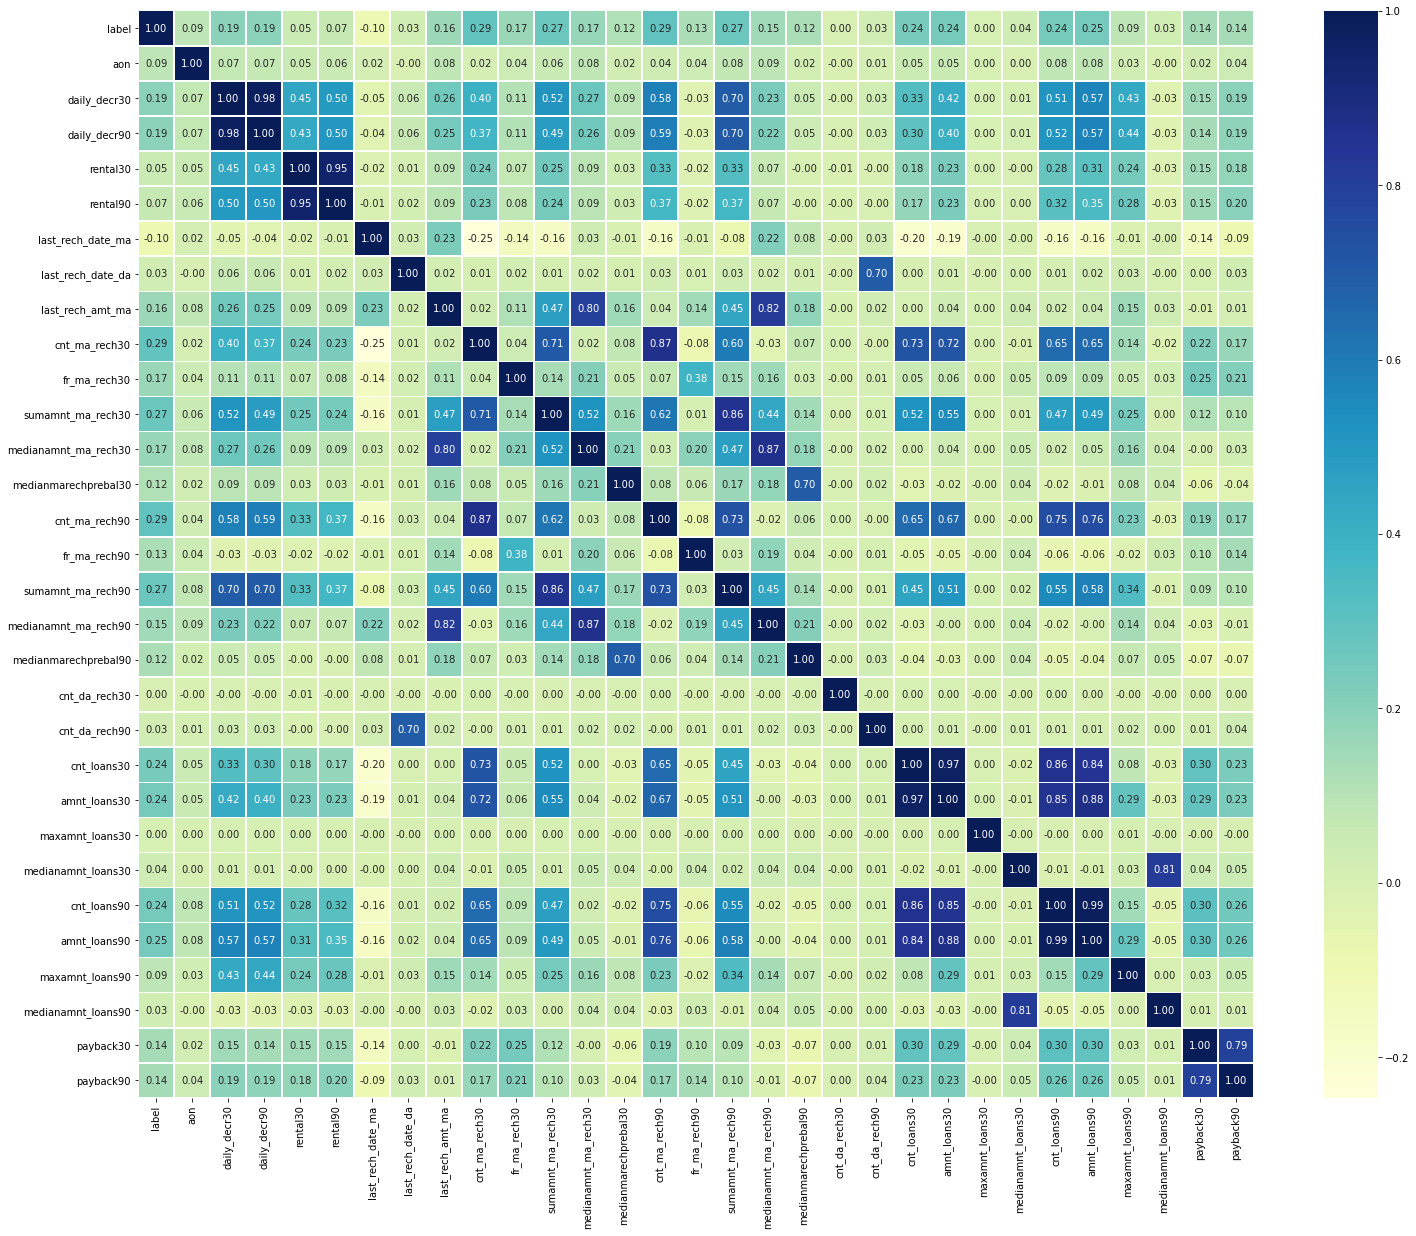

In [17]:
# Let's plot the correlation matrix
corr_matrix = df_final.corr()
fig, ax = plt.subplots(figsize=(25, 20))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

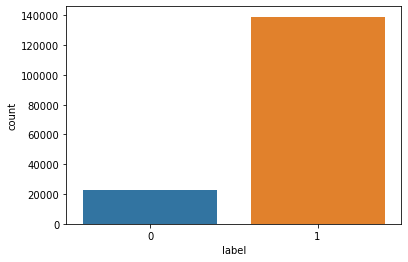

In [18]:
# countplot label
sns.countplot(df_final['label']) 

Here we can see very small number of customers are defaulters

In [ ]:
# Lets check the count for maximum loan amount in 90 days
sns.countplot(x='maxamnt_loans90',hue='label',data=df_final)

In [19]:
# Lets start modelling
# Split data into X and y
X = df_final.drop("label", axis=1)
y = df_final["label"]
X.shape, y.shape

((161465, 30), (161465,))

In [20]:
# Normalise data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [21]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((121098, 30), (40367, 30), (121098,), (40367,))

We're going to try below machine learning models:

 1. Logistic Regression
 2. K-Nearest Neighbours Classifier
 3. Random Forest Classifier
 4. SVC

In [23]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "SVC": SVC()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [24]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8666485000123864,
 'KNN': 0.8687294076844948,
 'Random Forest': 0.909034607476404,
 'SVC': 0.8700671340451359}

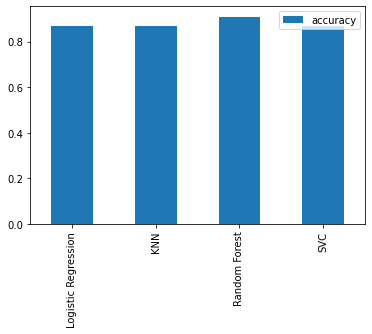

In [25]:
# Compare models
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Random foreset is giving more accuracy, so we can proceed with this.

In [26]:
def max_acc_score(reg, x, y):
    max_acc_score=0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = r_state, test_size=0.25)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        acc_score=accuracy_score(y_test, pred)
        if acc_score > max_acc_score:
            max_acc_score = acc_score
            final_r_state = r_state
    print("The max accuracy score for", reg, "is: ", max_acc_score, " achieved at", final_r_state)
    return final_r_state

In [30]:
rf = RandomForestClassifier()
max_acc_score(rf, X, y)

The max accuracy score for RandomForestClassifier() is:  0.911188183197597  achieved at 55


55

In [31]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(random_state=55), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 103.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=55),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [32]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 410,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': None}

In [33]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.9095796071048133

In [34]:
# Make predictions with tuned model
y_preds = rs_rf.predict(X_test)

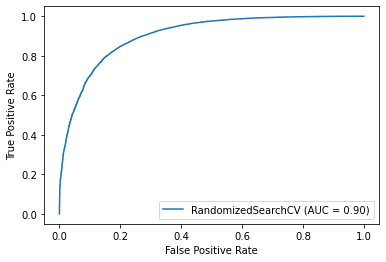

In [37]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_rf, X_test, y_test)

In [38]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[ 2537  2981]
 [  669 34180]]


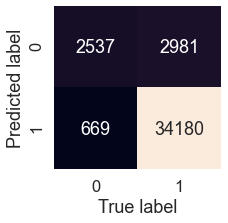

In [41]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
plot_conf_mat(y_test, y_preds)

In [44]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.46      0.58      5518
           1       0.92      0.98      0.95     34849

    accuracy                           0.91     40367
   macro avg       0.86      0.72      0.77     40367
weighted avg       0.90      0.91      0.90     40367

Accuracy:  0.9095796071048133


In [ ]:
# calculate cross-validated AUC
cross_val_score(rs_rf, X, y, cv=5, scoring='roc_auc').mean()

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 97.3min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
